<a href="https://colab.research.google.com/github/Steven-A3/DeepLearningZeroToAllColab/blob/master/RL_2_Dummy_FrozenLakeDet_QTable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gym > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (45.1.0)


In [0]:
import gym
from gym.envs.registration import register
import numpy as np
import random as pr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)

In [0]:
def rargmax(vector):
    """ 최대값이 여러개인 경우, 랜덤 선택하는 argmax """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [0]:
env = gym.make("FrozenLake-v3")

In [0]:
# Q 테이블 모든 값을 0으로 초기화한다.
Q = np.zeros([env.observation_space.n, env.action_space.n])
# 학습 파라메터 설정
num_episodes = 2000

# 에피소드 별 리워드를 저장할 목록을 준비
rList = []
for i in range(num_episodes):
    # 환경을 초기화하고 첫번째 상태를 돌려받음
    state = env.reset()
    rAll = 0
    done = False

    # Q-Learning 알고리즘
    while not done:
        action = rargmax(Q[state, :])

        # 액션을 실행하고, 보상과 새로운 상태를 구한다.
        new_state, reward, done, _ = env.step(action)

        # Q 테이블을 새롭게 알게된 값으로 업데이트 한다.
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

  env.close()

In [0]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")

for i in range(0,4):
    print(Q[i*4], Q[i*4+1], Q[i*4+2], Q[i*4+3])

Success rate: 0.951
Final Q-Table Values
LEFT DOWN RIGHT UP
[0. 1. 0. 0.] [0. 0. 0. 0.] [0. 0. 0. 0.] [0. 0. 0. 0.]
[0. 1. 0. 0.] [0. 0. 0. 0.] [0. 0. 0. 0.] [0. 0. 0. 0.]
[0. 0. 1. 0.] [0. 1. 0. 0.] [0. 1. 0. 0.] [0. 0. 0. 0.]
[0. 0. 0. 0.] [0. 0. 1. 0.] [0. 0. 1. 0.] [0. 0. 0. 0.]


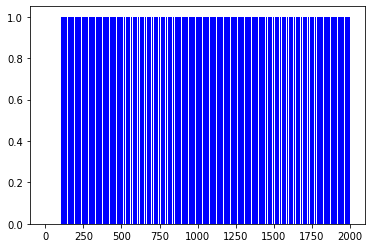

In [0]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()